In [2]:
import subprocess
from multiprocessing import Pool,cpu_count
import os
from itertools import product,repeat
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import spline
from scipy.ndimage.filters import gaussian_filter1d
from scipy import stats
import fileinput as fi

%run averaging.ipynb
%run optimize_slope.ipynb

ncores=cpu_count()

In [3]:
area_er = 2*(3.9+0.1+0.1*0.1+3.9*0.1)
vol_er = (3.9*0.1*0.1)
vol_cyt = (4.0*0.5*0.5-vol_er)
vol_tot = vol_cyt + vol_er
N_avo=6.0221409e23

In [216]:
script_folder="/home/kabir/Project/tripartiteSynapse/ryr_2x_norm"
fnames=["RSI20V90.mdl","RSI30V90.mdl","RSI40V90.mdl"]
seed_num=500

In [213]:
script_folder="/home/kabir/Project/tripartiteSynapse/ryr_2x_AD"
fnames=["RSI20V90.mdl","RSI30V90.mdl","RSI40V90.mdl"]
seed_num=500

In [217]:
#write run.sh
with open(script_folder+'/run.sh','w') as f:
    for name in fnames:
            loc=script_folder+'/'+name
            f.write("sed --i 's/^#PBS -J.*/#PBS -J 1-"+str(seed_num)+"/' pbs.py\n")
            f.write("qsub -N "+name.replace(".mdl",'norm')+" -v I='"+loc.replace('/kabir/Project/','/subhadra/kabir/')+"' pbs.py\n")
            f.write("\n")

In [218]:
#sync script files to cluster
p=subprocess.call(["rsync","-arhP",script_folder,"subhadra@192.168.1.244:/home/subhadra/kabir/tripartiteSynapse/"])

In [280]:
outfolder='AD/RSI40V90'

In [257]:
outfolder='AD'#RSI40V90'

In [258]:
#sync data back to this system
p=subprocess.call(["rsync","-arhP","subhadra@192.168.1.244:/storage/subhadra/kabir/output/ppf/"+outfolder,"/data/kabir/output/ppf/"])

In [281]:
#combine glutamate release data for each seed
data_loc="/data/kabir/output/ppf/"+outfolder+'/'
#get seed folders
seed_folders=os.listdir(data_loc)

count=0
if "Average" in seed_folders:
    seed_folders.remove("Average")
for s in seed_folders:
    s=data_loc+s+"/dat/"
    file_names=os.listdir(s)
    output=[]
    for f_name in file_names:
        if 'vdcc.' in f_name:
            with open(s+f_name,'r') as f:
                output=output+f.readlines()
    with open(s+'rel.dat','w') as f:
        f.writelines(output)
    count+=len(output)

count/500

0.67

In [1]:
%run testLocal.py norm/RSI20V90

dataPath :  /data/kabir/output/ppf/norm/RSI20V90
resultPath :  /home/kabir/Project/tripartiteSynapse/results/ppf/norm/RSI20V90


In [2]:
ppf(resample=10)

isi:  20 vdcc:  90
seeds:  500
[0.04359999999999999, 0.006248199740725324, 0.3368, 0.017780888616714285, 7.883160953844021, 1.200554632498525, 20.0, 90.0]


In [261]:
%run averaging1.ipynb

averager("/data/kabir/output/ppf/norm/RSI40V90","ca.dat",[2,3])

In [208]:
outfolder='norm/RSI20V40'
data_file="/data/kabir/output/ppf/norm/RSI20V40/Average/ca.dat"
data1=np.loadtxt(data_file)

outfolder='AD/RSI40V90/'
data_file="/data/kabir/output/ppf/AD/RSI40V90/Average/ca.dat"
data2=np.loadtxt(data_file)

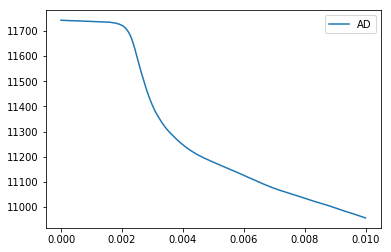

In [210]:
#plt.plot(data1.T[0,:],data1.T[1,:],label='normal')#*1e15/N_avo/vol_er*1e6)
plt.plot(data2.T[0,:],data2.T[2,:],label='AD')#*1e15/N_avo/vol_er*1e6)
plt.legend()

In [11]:
data1.T[:,0]

array([   0.,    0.,   57., 5872.])

# Search and Replace in files

In [150]:
dataloc="/home/kabir/Project/tripartiteSynapse/ryr_2x_AD/"
files=os.listdir(dataloc)
new_files=[]
for f in files:
    if "RSI" in f:
        new_files.append(f)
#new_files

In [151]:
for fn in new_files:
    with fi.FileInput(dataloc+fn,inplace=True, backup='.bak') as f:
        for line in f:
            print(line.replace('"ppf/"','"ppf/AD/"'), end='')